## Math 167PS, Spring 2021, Instructor: Dr. Bremer
## Python Project: International COVID-19 Vaccination Rates and Country Characteristics
## Project Team: Shu Ding, Marlena Jacobs, Mary Keonoupheth, Arnaud Laprais

## Import Packages and Specify Path

To run this code, first download the data files, noting the folder location.
Enter the path to the folder below as data_folder, and uncomment that line of code.

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Data folder location
##data_folder = Path('....')


### Read in COVID-19 Data

To remove rows of data that were not countries (i.e 'Africa) we created a list of indices that included the string ‘OWID’ in its iso code, as these indicated non-country rows of data. We subsetted the data set by using these indices to exclude non-country rows of data along with the most recent data (April 24, 2021) for each country. We then extracted the variables that we were interested in analyzing and combined these variables into a new data frame. We also created a column for vaccination rates by calculating the proportion of people vaccinated to the country’s total population as a way to reasonably compare vaccine distribution among the countries and another column for case fatailty rate by getting the ratio between the confirmed total deaths and the confirmed total cases.

In [2]:
# COVID data

#read in COVID data set
vaccine_data = pd.read_csv(data_folder/'owid-covid-data.csv')

#list of indices for rows that are not countries(i.e Africa)
exclude = [i for i in range(len(vaccine_data.location)) if vaccine_data['iso_code'].values[i].count('OWID')>0]

#subset newest data and excluding the rows that are not countries
newest = vaccine_data[(~vaccine_data.index.isin(exclude)) & ((vaccine_data.date=='2021-04-24')|(vaccine_data.date=='4/24/2021'))]

# extract only columns of interest
location = newest['location']
continent = newest['continent']
date = newest['date']
total_cases = newest['total_cases']
total_cases_per_million = newest['total_cases_per_million']
new_cases = newest['new_cases']
total_deaths = newest['total_deaths']
total_deaths_per_million = newest['total_deaths_per_million']
new_deaths = newest['new_deaths']
total_vac = newest['total_vaccinations']
ppl_vac = newest['people_vaccinated']
ppl_fullyvac = newest['people_fully_vaccinated']
totalvac_perhund = newest['total_vaccinations_per_hundred']
pplvac_perhund = newest['people_vaccinated_per_hundred']
pplfullyvac_perhund = newest['people_fully_vaccinated_per_hundred']
case_fatality_rate=np.around(np.divide(newest['total_deaths'],newest['total_cases'])*100,2)
population = newest['population']
vac_rate=np.around(np.divide(newest['people_vaccinated'],newest['population'])*100,2)

#create new data frame
new_vaccine = pd.DataFrame({'location':location,'continent':continent,'date':date,\
                            'total_cases':total_cases,'new_cases':new_cases,\
                           'total_deaths':total_deaths,'new_deaths':new_deaths,'total_vac':total_vac,\
                           'ppl_vac':ppl_vac,'ppl_fullyvac':ppl_fullyvac,'totalvac_perhund':totalvac_perhund,\
                           'pplvac_perhund':pplvac_perhund,'pplfullyvac_perhund':pplfullyvac_perhund,
                            'case_fatality_rate':case_fatality_rate,'population':population,'vac_rate':vac_rate,\
                           'total_cases_per_million':total_cases_per_million,\
                            'total_deaths_per_million':total_deaths_per_million})
new_vaccine.head()

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_vac,ppl_vac,ppl_fullyvac,totalvac_perhund,pplvac_perhund,pplfullyvac_perhund,case_fatality_rate,population,vac_rate,total_cases_per_million,total_deaths_per_million
425,Afghanistan,Asia,2021-04-24,58730.0,188.0,2572.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,4.38,38928341.0,NaN,1508.669,66.070
1297,Albania,Europe,2021-04-24,130409.0,139.0,2372.0,5.0,400064.0,NaN,NaN,13.9,NaN,NaN,1.82,2877800.0,NaN,45315.519,824.241
1727,Algeria,Africa,2021-04-24,120736.0,174.0,3198.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2.65,43851043.0,NaN,2753.321,72.929
2151,Andorra,Europe,2021-04-24,13024.0,17.0,124.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.95,77265.0,NaN,168562.739,1604.866
2557,Angola,Africa,2021-04-24,25492.0,213.0,577.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.26,32866268.0,NaN,775.628,17.556


## Read in Age Demographic Data

Here we read in age demographic data from OWID. We restricted our view to data collected from 2020. In order to only select countries (and exclude continents/regions) we constructed a country list with the help of google, and used that list to create a list of non-countries which in turn was used to subset the data. Finally we created new columns of percentages, based on the existing columns that gave raw counts.

In [3]:
### AGE DEMOGRAPHIC DATA ########### 
### final dataframe: age_df  ####### 

age_file = data_folder/'population-by-broad-age-group.csv'
age_df = pd.read_csv(age_file)    

age_df = age_df[age_df.Year == 2020]  # data from 2020
age_df = age_df.drop(["Year"], axis = 1) # remove year col since all 2020

age_df = age_df.reset_index().drop(['index'], axis = 1)  # reset index of df

# list of non-countries
non_countries = [
    'Africa', 'Asia', 'Asia, Central', 'Caribbean', 'Central African Republic', 'Central America', 
 'Central and Southern Asia', 'Channel Islands', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 
 'Eastern and South-Eastern Asia', 'Europe', 'Europe and Northern America', 'Europe, Western', 
 'High income countries', 'Land-locked Developing Countries (LLDC)', 'Latin America and the Caribbean', 
 'Least Developed Countries', 'Less Developed Regions', 'Less Developed Regions, excluding China', 
 'Less Developed Regions, excluding Least Developed Countries', 'Low-income countries', 
 'Lower-middle-income countries', 'Melanesia', 'Middle Africa', 'Middle-income countries', 
 'More Developed Regions', 'No income group available', 'Northern Africa', 'Northern Africa and Western Asia', 
 'Northern America', 'Northern Europe', 'Oceania', 'Oceania (excluding Australia and New Zealand)', 
 'Small Island Developing States (SIDS)', 'South America', 'South Eastern Asia', 'Southern Africa', 
 'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'United States Virgin Islands', 
 'Upper-middle-income countries', 'Western Africa', 'Western Asia', 'World'
]

# removing non-countries
for row in range(len(age_df.Entity)):
    if age_df.Entity[row] in non_countries:
        age_df = age_df.drop(row, axis = 0)

# formatting        
age_df = age_df.reset_index().drop(['index', 'Code'], axis = 1)
age_df.columns = ['Country', 'Pop (thousands) < age 5', 'Pop (thousands) age 5-14', 'Pop (thousands) age 15-24 ', 
                  'Pop (thousands) age 25-64', 'Pop (thousands) > age 65']

## Adding Population percentage cols ##
Pop_total = age_df.iloc[:,1:5].sum(1)

age_df['Total Pop (thousands)'] = Pop_total
age_df['%Pop < age 5'] = age_df.iloc[:,1]/Pop_total * 100
age_df['%Pop age 5-14'] = age_df.iloc[:,2]/Pop_total * 100
age_df['%Pop age 15-24'] = age_df.iloc[:,3]/Pop_total * 100
age_df['%Pop age 25-64'] = age_df.iloc[:,4]/Pop_total * 100
age_df['%Pop > age 65'] = age_df.iloc[:,5]/Pop_total * 100

## Adding "% under 25 col" ##
under_25 = age_df['%Pop < age 5'] + age_df['%Pop age 5-14'] + age_df['%Pop age 15-24']
age_df['%Pop < age 25'] = under_25

age_df.head()

,Country,Pop (thousands) < age 5,Pop (thousands) age 5-14,Pop (thousands) age 15-24,Pop (thousands) age 25-64,Pop (thousands) > age 65,Total Pop (thousands),%Pop < age 5,%Pop age 5-14,%Pop age 15-24,%Pop age 25-64,%Pop > age 65,%Pop < age 25
0,Afghanistan,5672509.0,10608337.0,8555930.0,13060327.0,1031238.0,37897103.0,14.968186,27.992475,22.576739,34.462600,2.721153,65.537400
1,Albania,166278.0,329735.0,427953.0,1530665.0,423169.0,2454631.0,6.774053,13.433180,17.434515,62.358253,17.239618,37.641747
2,Algeria,5041518.0,8457374.0,5910182.0,21485130.0,2956839.0,40894204.0,12.328197,20.681107,14.452371,52.538325,7.230460,47.461675
3,Angola,5795004.0,9453425.0,6415084.0,10482505.0,720250.0,32146018.0,18.027129,29.407764,19.956077,32.609031,2.240557,67.390969
4,Antigua and Barbuda,7355.0,14042.0,14632.0,52759.0,9140.0,88788.0,8.283777,15.815200,16.479704,59.421318,10.294184,40.578682


## Read in Health Expenditure Data

The health expenditure data was extracted from the WHO website as excel files, with one row per country per indicator of interest, and one year per column. Our indicators of interest were: expenditure on health care, expenditure on preventive care, and expenditure on immunization programs. The WHO website allows extraction of one unit of measure at a time, so we started with three Excel spreadsheets (for expenditure in US dollars per capita, as a percent of GDP, and as a percent of total health expenditure). 

In this section we read in the excel files to create pandas dataframes. We only used the columns for the most recent year (2018). We reshaped the data into a dataframe with one row per country, with the columns as the indicators of interest. We gave the columns descriptive names, including the indicator and the unit of measure. We converted zero values, which we believe to be mistakes, to missing values. 

We merged the three resulting dataframes for the three measures of expenditure. Because we found that OWID and WHO data used different country names, we created a new variable, 'location' to use for merging with OWID data. The 'location' variable has a country name that matches the country names in OWID. 

The final health expenditure dataframe, called health_expenditure, has one row per country, and includes all eight health expenditure variables of interest.


In [4]:
### HEALTH EXPENDITURE DATA ########### 
### final dataframe: health_expenditure  ####### 
#Health expenditure data from WHO:
#   Health expenditure as percent of GDP
#   Health expenditure as percent of total health care spending
#   Health expenditure in US dollars, per capita 
################################################################################
#Health expenditures as percent of GDP, 2018
file1_to_open = data_folder/"WHO_Data_percent_of_GDP.xlsx"

col_list1 = ['Countries', 'Indicators', '2018']
he_gdp1 = pd.read_excel(file1_to_open, header=0, usecols=col_list1)

#drop empty first row
he_gdp1.drop([0], inplace=True)

#drop rows with all missing data
he_gdp1=he_gdp1[he_gdp1['2018'].notna()]

#reshape data: from one row per country and indicator, to one row per country
he_gdp1.set_index(['Countries','Indicators'], inplace=True)
he_gdp2=he_gdp1.unstack()

#rename columns
he_gdp2.rename(columns={'Current health expenditure by Health Care Functions':'Total HCE (% of GDP)',\
          'Immunization Programmes':'Immunization expediture (% of GDP)',\
                  'Preventive care':'Preventive care expenditure (% of GDP)'}, inplace=True)
#get rid of unneeded column level
he_gdp3=he_gdp2.droplevel(level=0,axis=1)

#reset index
he_gdp3.reset_index(inplace=True)

#drop index label
he_gdp = he_gdp3.rename_axis(None, axis=1)

######################################################################################################
#Health expenditures as percent of total health care spending, 2018
col_list1 = ['Countries', 'Indicators', '2018']
file2_to_open = data_folder/"WHO_Data_percent_of_current_HCE.xlsx"
he_pct_total1 = pd.read_excel(file2_to_open, header=0, usecols=col_list1)

#drop empty first row
he_pct_total1.drop([0], inplace=True)

#treat zeros as missing
he_pct_total1.replace(0, np.nan, inplace=True)

#drop rows with all missing data
he_pct_total1=he_pct_total1[he_pct_total1['2018'].notna()]

#Only need preventive care, immunization programmes
he_pct_total2=he_pct_total1[(he_pct_total1['Indicators']=='Preventive care')|\
                            (he_pct_total1['Indicators']=='Immunization Programmes')]

#reshape data: from one row per country and indicator, to one row per country
he_pct_total2.set_index(['Countries','Indicators'], inplace=True)
he_pct_total3=he_pct_total2.unstack()

#rename columns
he_pct_total3.rename(columns={'Immunization Programmes':'Immunization expediture (% of total HCE)',\
                  'Preventive care':'Preventive care expenditure (% of total HCE)'}, inplace=True)
#get rid of unneeded column level
he_pct_total4=he_pct_total3.droplevel(level=0,axis=1)

#reset index
he_pct_total4.reset_index(inplace=True)

#drop index label
he_pct_total= he_pct_total4.rename_axis(None, axis=1)
he_pct_total.replace(0, np.nan, inplace=True)

######################################################################################################
#Health expenditure in US dollars per capita, 2018
file3_to_open = data_folder/"WHO_Data_US_dollars_per_capita.xlsx"
col_list1 = ['Countries', 'Indicators', '2018']
he_US_dollars1 = pd.read_excel(file3_to_open, header=0, usecols=col_list1)

#drop empty first row
he_US_dollars1.drop([0], inplace=True)

#drop rows with all missing data
he_US_dollars1=he_US_dollars1[he_US_dollars1['2018'].notna()]

#reshape data: from one row per country and indicator, to one row per country
he_US_dollars1.set_index(['Countries','Indicators'], inplace=True)

he_US_dollars2=he_US_dollars1.unstack()

#rename columns
he_US_dollars2.rename(columns={'Current health expenditure by Health Care Functions':'Total HCE (US dollars per capita)',\
          'Immunization Programmes':'Immunization expediture (US dollars per capita)',\
                  'Preventive care':'Preventive care expenditure (US dollars per capita)'}, inplace=True)

#get rid of unneeded column level
he_US_dollars3=he_US_dollars2.droplevel(level=0,axis=1)

#reset index
he_US_dollars3.reset_index(inplace=True)

#drop index label
he_US_dollars = he_US_dollars3.rename_axis(None, axis=1)

######################################################################################################
#Merge the 3 Health Expenditure datasets
health_expenditure1 = he_US_dollars.merge(he_gdp, left_on='Countries',right_on='Countries', how='outer')

health_expenditure = health_expenditure1.merge(he_pct_total, left_on='Countries',right_on='Countries', how='outer')
health_expenditure.sort_values(by=['Countries'], inplace=True)

#Create a new column (called location) which matches the country names in OWID
he_list = health_expenditure["Countries"].tolist()
new_list=[]
for i in he_list:
    if i == "Cabo Verde Republic of":
        new_list.append("Cape Verde")
    elif i == "Czech Republic":
        new_list.append("Czechia")
    elif i == "Côte d'Ivoire":
        new_list.append("Cote d'Ivoire")
    elif i == "Democratic Republic of the Congo":
        new_list.append("Democratic Republic of Congo")
    elif i == "Lao People's Democratic Republic":
        new_list.append("Laos")
    elif i == "Republic of Korea":
        new_list.append("South Korea")
    elif i == "Republic of Moldova":
        new_list.append("Moldova")
    elif i == "Russian Federation":
        new_list.append("Russia")
    elif i == "The Republic of North Macedonia":
        new_list.append("North Macedonia")
    elif i == "Timor-Leste":
        new_list.append("Timor")
    elif i == "United Republic of Tanzania":
        new_list.append("Tanzania")
    elif i == "United States of America":
        new_list.append("United States")
    else:
        new_list.append(i)
health_expenditure['location']= new_list

#Change order of columns, omit "Countries" column ("location" will match with OWID)
col_names=['location',\
           'Total HCE (US dollars per capita)','Total HCE (% of GDP)',\
           'Immunization expediture (US dollars per capita)','Immunization expediture (% of GDP)',\
           'Immunization expediture (% of total HCE)',\
           'Preventive care expenditure (US dollars per capita)','Preventive care expenditure (% of GDP)',\
           'Preventive care expenditure (% of total HCE)']
health_expenditure = health_expenditure[col_names]
health_expenditure.head()

,location,Total HCE (US dollars per capita),Total HCE (% of GDP),Immunization expediture (US dollars per capita),Immunization expediture (% of GDP),Immunization expediture (% of total HCE),Preventive care expenditure (US dollars per capita),Preventive care expenditure (% of GDP),Preventive care expenditure (% of total HCE)
0,Afghanistan,49.8426,9.39573,0.206523,0.0389313,0.414351,3.28841,0.619891,6.597584
1,Armenia,422.283,10.0254,1.03839,0.0246523,0.245899,3.37681,0.0801687,0.799656
2,Austria,5326.44,10.3256,NaN,NaN,NaN,112.117,0.217346,2.104921
3,Barbados,1164.54,6.56259,NaN,NaN,NaN,27.6546,0.155843,2.374715
4,Belarus,356.251,5.64427,1.06268,0.0168366,0.298295,6.11055,0.0968126,1.715238


## Read in Political Regime Data

This data set is also from owid showing the “Democracy Score”. We're interested in the 'Political Regime' variable of the most recent recorded year (2015). 'Political Regime' column shows the "Democracy Score” which goes from −10 (full autocracy) to 10 (full democracy). We filtered out the rows of the dataframe whose years are not 2015, which is the most recent recorded year in the dataset. Then we extracted the columns of location and political regime, thus forming a new dataframe called 'pol_reg'.

In [5]:
## Political Regime DATA 

import pandas as pd
import numpy as np

pol_reg = pd.read_csv(data_folder/'political-regime-updated2016.csv')

# This data set is also from owid showing the “Democracy Score”
# We're interested in the 'Political Regime' variable of the most recent recorded year (2015)
# 'Political Regime' column shows the "Democracy Score” which goes from −10 (full autocracy) to 10 (full democracy)
# merge the two dataframe to a new dataframe called 'df_covid'

pol_reg=pol_reg[pol_reg.Year ==2015]
pol_reg=pd.DataFrame({'location':pol_reg['Entity'], 
                  'PoliticalRegime':pol_reg['Political Regime (OWID based on Polity IV and Wimmer & Min)']})
pol_reg.head()


,location,PoliticalRegime
176,Afghanistan,-1
375,Albania,9
575,Algeria,2
775,Angola,-2
966,Argentina,9


## Merge Data

In [6]:
### MERGING HERE ###
full_df = pd.merge(pol_reg,new_vaccine,how='right',on='location')
full_df1 = pd.merge(full_df,age_df, left_on = 'location', right_on = 'Country', how = 'left')
full_df2 = pd.merge(full_df1, health_expenditure, on = "location", how = 'left')
full_df2.head()

covid_df = full_df2[(~full_df2["vac_rate"].isnull())]
covid_df.head()

,location,PoliticalRegime,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_vac,ppl_vac,...,%Pop > age 65,%Pop < age 25,Total HCE (US dollars per capita),Total HCE (% of GDP),Immunization expediture (US dollars per capita),Immunization expediture (% of GDP),Immunization expediture (% of total HCE),Preventive care expenditure (US dollars per capita),Preventive care expenditure (% of GDP),Preventive care expenditure (% of total HCE)
6,Argentina,9.0,South America,2021-04-24,2845872.0,21220.0,61474.0,298.0,7017279.0,6149835.0,...,12.824178,45.085244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Aruba,NaN,North America,2021-04-24,NaN,NaN,NaN,NaN,69279.0,49351.0,...,17.102651,36.559069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Austria,10.0,Europe,2021-04-24,606954.0,2131.0,10070.0,15.0,2821193.0,2035335.0,...,23.768502,31.045894,5326.44,10.3256,NaN,NaN,NaN,112.117,0.217346,2.104921
11,Azerbaijan,-7.0,Asia,2021-04-24,311465.0,1676.0,4342.0,35.0,1412481.0,934906.0,...,7.228883,39.559710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Bahrain,-10.0,Asia,2021-04-24,170335.0,1081.0,620.0,3.0,1168650.0,652170.0,...,2.723752,29.682124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This code block merges our dataframes by country into one "master" dataframe. Since our primary variable of interest in the project is vaccination rate, we removed observations that had missing vaccination rate data.

# SUMMARY STATISTICS

# Summary Statistics Tables
This function creates summary tables. 
The function takes as its input a list of variables from the dataframe covid_df, and returns a summary table. The table includes: mean, median, first quartile, third quartile, maximum, minimum, and count of non-missing values.

In [7]:
def summary_table(mylist):
    """Given a list of column names from dataframe covid_df, returns summary table"""
    means={i:round(covid_df[i].mean(),4) for i in mylist}
    meds={i:round(covid_df[i].median(),4) for i in mylist}
    q1={i:round(covid_df[i].quantile(q=0.25),4) for i in mylist}
    q3={i:round(covid_df[i].quantile(q=0.75),4) for i in mylist}
    mins={i:round(covid_df[i].min(),4) for i in mylist}
    maxs={i:round(covid_df[i].max(),4) for i in mylist}
    nonmiss={i:covid_df[i].count() for i in mylist}
    
    return pd.DataFrame({"Mean":means,"Median":meds, "1st Quantile":q1, "3rd quantile":q3,\
                  "Minimum":mins,"Maximum":maxs, "Non-missing count":nonmiss})
    
    summary_table.__doc__


## Summary Statistics for COVID vaccination data



In [8]:
## summary statistics for vaccination rates
vac_summary = summary_table(['vac_rate'])
vac_summary

,Mean,Median,1st Quantile,3rd quantile,Minimum,Maximum,Non-missing count
vac_rate,15.9722,11.74,3.02,22.6,0.2,62.17,77


Plot the distribition of vaccination rates to see if there are any trends.

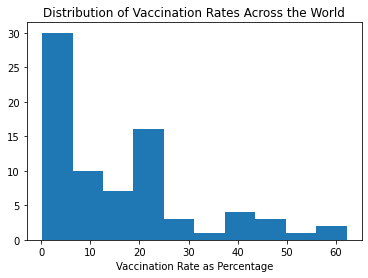

In [9]:
plt.hist(covid_df.vac_rate) #plot histogram of vaccination rates
plt.title('Distribution of Vaccination Rates Across the World') #plot title
plt.xlabel('Vaccination Rate as Percentage'); #plot x label

Vaccination rate is the proportion of people vaccinated in a country compared to the total population of the country. The distribution of vaccination rates is right skewed. There are more countries with a vaccination rate below 25% and fewer countries with a vaccination rate above 25%.

Determine which countries have the highest and lowest vaccination rates.

In [10]:
#country with highest vaccination rate
print("{0} has the highest recorded vaccination rate with {1}% of its population vaccinated.".\
format(covid_df[covid_df.vac_rate==vac_summary.Maximum.vac_rate].location.values[0], vac_summary.Maximum.vac_rate))

#country with lowest vaccination rate
print("{0} has the lowest recorded vaccination rate with {1}% of its population vaccinated.".\
format(covid_df[covid_df.vac_rate==vac_summary.Minimum.vac_rate].location.values[0], vac_summary.Minimum.vac_rate))

Bhutan has the highest recorded vaccination rate with 62.17% of its population vaccinated.
Vietnam has the lowest recorded vaccination rate with 0.2% of its population vaccinated.


## Summary Statistics for Case, Mortality, and Case Fatality Rate



Histgrams and Code for Covid-19 Cases and Mortality Data
The 3 histgrams display the distribution of "Total Cases Per Million", "Total Deaths Per Million" and "Case Fatality Rate" and their corresponding counts of coutries who have started their vaccination. 

Total cases/deaths per million for a country is the ratio of the confirmed cases/death out of a million population. 

The Case Fatality Rate is a straightforward measurement showing the mortality risk of COVID-19. It is the ratio between the confirmed total deaths and the confirmed total cases for per hundred people. (Below)

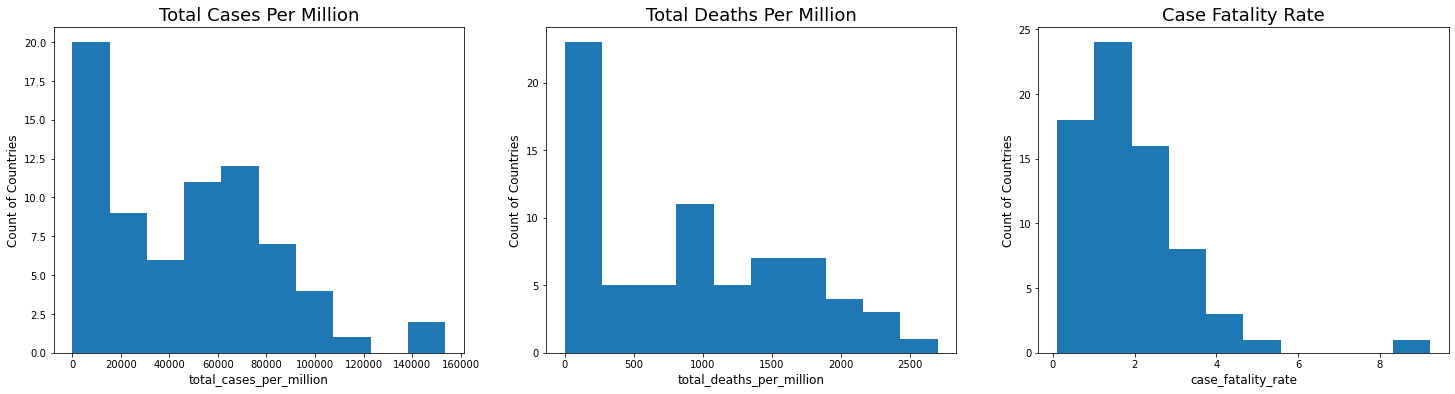

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

cols=['total_cases_per_million', 'total_deaths_per_million', 
      'case_fatality_rate']

for i in range(3):
    axs[i].hist(covid_df[cols[i]])
    axs[i].set_ylabel('Count of Countries',size=12) 
    axs[i].set_xlabel(cols[i],size=12)

axs[0].set_title("Total Cases Per Million",size=18)
axs[1].set_title("Total Deaths Per Million",size=18)
axs[2].set_title("Case Fatality Rate",size=18);

1st graph is right skewed distributed. For the 1st quantile, median, and the 3rd quantile, the total cases are 11.37k, 50.48k and 72.77k reslectively in every million of the population. Nearly 80% of the countries have the total confirmed cases per million is less than 80k. While there are 2 countries have outstanding high rates of the total cases per million that are more than 140k: there are 153.65k and 151.09k for Montenegro and Czechia respectively. 

In the 2nd graph, except for the most left column, it is almost uniform distributed: graph (2nd). For the 1st quantile, median, and the 3rd quantile, the total deaths are 134, 866, 1428 reslectively in every million of the population. There are 7 countries have outstanding high rates that exceed 2k. The top 3 coutries with the high deaths rate are Czechia, Montenegro and Bulgaria with the corresponding figures of 2.70k, 2.33k and 2.28k.

3rd graph is also right skewed distributed. Around 88% of the countries have the case fatality rate per million is no more than 4. There is only 1 country have an outstanding high rate of of 9. The top 2 coutries with the high deaths rate case fatality rate are Mexico and Ecuador with 9 and 5 respectively.  

Get summary statistics by using the summary_table function.



In [12]:
var = ['case_fatality_rate','total_cases_per_million','total_deaths_per_million']

cases_summary = summary_table(var)
cases_summary

,Mean,Median,1st Quantile,3rd quantile,Minimum,Maximum,Non-missing count
case_fatality_rate,1.9083,1.690,1.045,2.4750,0.100,9.230,71
total_cases_per_million,46231.7184,50479.912,11367.711,72772.6890,29.105,153645.659,72
total_deaths_per_million,889.7905,865.668,133.556,1427.9615,0.360,2700.537,71


Find countries with highest and lowest case fatality rates.

In [13]:
#country with highest case fatality rate
print("{0} has the highest recorded case fatality rate with a rate of {1}%.".\
format(covid_df[covid_df.case_fatality_rate==cases_summary.Maximum.case_fatality_rate].location.values[0], \
       cases_summary.Maximum.case_fatality_rate))

#country with lowest case fatality rate
print("{0} has the lowest recorded case fatality rate with a rate of {1}%.".\
format(covid_df[covid_df.case_fatality_rate==cases_summary.Minimum.case_fatality_rate].location.values[0], \
       cases_summary.Minimum.case_fatality_rate))

Mexico has the highest recorded case fatality rate with a rate of 9.23%.
Bhutan has the lowest recorded case fatality rate with a rate of 0.1%.


Find countries with highest and lowest cases per million.

In [14]:
#country with highest cases per million
print("{0} has the highest recorded total cases per million with {1} cases per million.".\
format(covid_df[covid_df.total_cases_per_million==cases_summary.Maximum.total_cases_per_million].location.values[0], \
       cases_summary.Maximum.total_cases_per_million))

#country with lowest cases per million
print("{0} has the lowest recorded total cases per million with {1} cases per million.".\
format(covid_df[covid_df.total_cases_per_million==cases_summary.Minimum.total_cases_per_million].location.values[0], \
       cases_summary.Minimum.total_cases_per_million))

Montenegro has the highest recorded total cases per million with 153645.659 cases per million.
Vietnam has the lowest recorded total cases per million with 29.105 cases per million.


Find countries with the highest and lowest deaths per million.

In [15]:
#country with highest deaths per million
print("{0} has the highest recorded total deaths per million with {1} deaths per million.".\
format(covid_df[covid_df.total_deaths_per_million==max(covid_df.total_deaths_per_million)].location.values[0], \
       cases_summary.Maximum.total_deaths_per_million))

#country with lowest deaths per million
print("{0} has the lowest recorded total deaths per million with {1} deaths per million.".\
format(covid_df[covid_df.total_deaths_per_million==cases_summary.Minimum.total_deaths_per_million].location.values[0], \
       cases_summary.Minimum.total_deaths_per_million))

Czechia has the highest recorded total deaths per million with 2700.537 deaths per million.
Vietnam has the lowest recorded total deaths per million with 0.36 deaths per million.


Other summary statistics including the total count in certain range, top 3 highest death rate coutries, etc. 

In [16]:
## summary statistic code for total_cases_per_million of all recorded countries
count_less_than_80k = sum(covid_df.total_cases_per_million<=80000)
count_more_than_140k = sum(covid_df.total_cases_per_million>=140000)
# print([count_less_than_80k, count_more_than_140k])

temp_df1=covid_df.sort_values(by=['total_cases_per_million'], ascending=False, inplace=False)
#print([temp_df1.location.values[0],round(temp_df1.total_cases_per_million.values[0])])
#print([temp_df1.location.values[1],round(temp_df1.total_cases_per_million.values[1])])

###############
count_less_than_200 = sum(covid_df.total_deaths_per_million<=200)
count_more_than_2k = sum(covid_df.total_deaths_per_million>=2000)
#print([count_less_than_200, count_more_than_2k])

temp_df2=covid_df.sort_values(by=['total_deaths_per_million'], ascending=False, inplace=False)
#print([temp_df2.location.values[0],round(temp_df2.total_deaths_per_million.values[0])])
#print([temp_df2.location.values[1],round(temp_df2.total_deaths_per_million.values[1])])
#print([temp_df2.location.values[2],round(temp_df2.total_deaths_per_million.values[2])])

################
count_less_than_4 = sum(covid_df.case_fatality_rate<=4)
count_more_than_8 = sum(covid_df.case_fatality_rate>8)
#print(count_less_than_4, count_more_than_8)

temp_df3=covid_df.sort_values(by=['case_fatality_rate'], ascending=False, inplace=False)
#print([temp_df3.location.values[0],round(temp_df3.case_fatality_rate.values[0])])
#print([temp_df3.location.values[1],round(temp_df3.case_fatality_rate.values[1])])

## Summary Statistics for Age Demographics

In [17]:
## SUMMARY TABLE
cols = ['%Pop < age 5', '%Pop age 5-14', '%Pop age 15-24', '%Pop age 25-64', '%Pop > age 65', '%Pop < age 25']
summary_table(cols)

,Mean,Median,1st Quantile,3rd quantile,Minimum,Maximum,Non-missing count
%Pop < age 5,8.6426,7.4699,6.4507,9.7223,4.3939,17.3892,75
%Pop age 5-14,16.8078,15.4189,13.0782,19.1188,9.5795,29.5590,75
%Pop age 15-24,15.7447,15.1203,13.2128,18.5628,10.2286,22.0993,75
%Pop age 25-64,58.8050,62.2978,53.1940,67.8876,31.6714,74.0542,75
%Pop > age 65,14.8749,14.1740,7.4964,23.2384,2.0259,30.3813,75
%Pop < age 25,41.1950,37.7022,32.1124,46.8060,25.9458,68.3286,75


The above code passes the list "cols" to the function "summary_table" to get the summary statistics from those columns of the covid_df dataframe.

## Summary Statistics for Health Expenditure Data
This code utilizes the summary_table function to create a table of summary statistics for the eight health expenditure variables.

In [18]:
he_vars=['Total HCE (US dollars per capita)','Total HCE (% of GDP)',\
           'Immunization expediture (US dollars per capita)','Immunization expediture (% of GDP)',\
           'Immunization expediture (% of total HCE)',\
           'Preventive care expenditure (US dollars per capita)','Preventive care expenditure (% of GDP)',\
           'Preventive care expenditure (% of total HCE)']
summary_table(he_vars)

,Mean,Median,1st Quantile,3rd quantile,Minimum,Maximum,Non-missing count
Total HCE (US dollars per capita),2287.1891,1206.8996,399.4210,3239.9869,38.3176,10623.8495,46
Total HCE (% of GDP),7.5063,7.2027,6.2735,9.1432,2.2463,16.8853,46
Immunization expediture (US dollars per capita),4.1796,2.7828,1.5923,4.8908,0.2598,20.0738,33
Immunization expediture (% of GDP),0.0446,0.0379,0.0192,0.0488,0.0023,0.1566,33
Immunization expediture (% of total HCE),0.8446,0.5077,0.2742,0.8226,0.0220,3.7377,33
Preventive care expenditure (US dollars per capita),69.8955,30.7229,11.7215,88.4314,3.2449,309.1007,45
Preventive care expenditure (% of GDP),0.3701,0.2206,0.1594,0.4913,0.0513,2.6047,45
Preventive care expenditure (% of total HCE),5.8317,3.1317,2.3747,5.6817,0.7678,39.9108,45


This code creates histograms of the 8 health expenditure variables (not included in paper), to examine their distribution.
All variables are highly right-skewed, with the exception of Total HCE as a % of GDP, which has a more symmetric distribution.

Please note: for ease of comparison, the 8 histograms are presented in a 3x3 panel plot. The first row has total health expenditure, and there are only two health exenditure variables, so there is one blank cell in the top right of the panel plot.

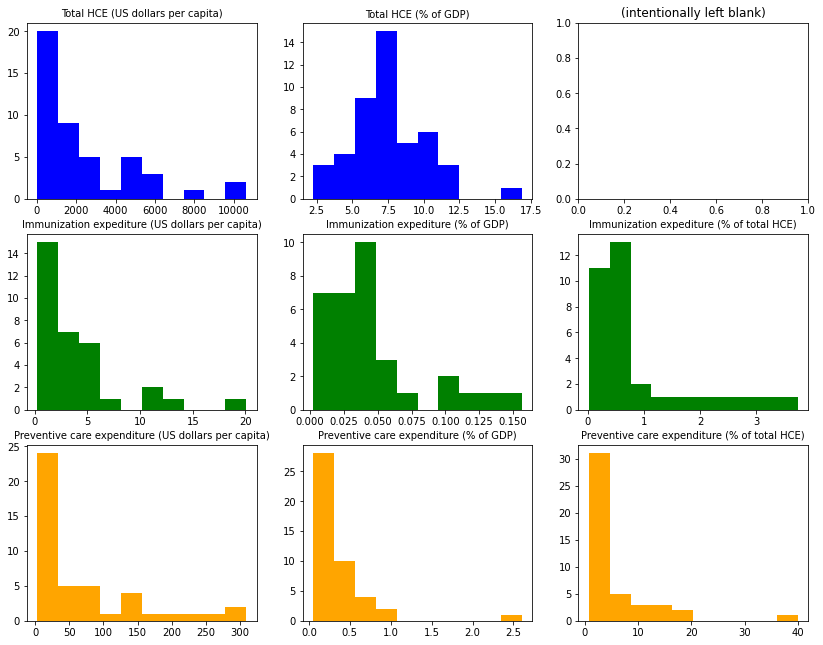

In [19]:
he_vars2=['Total HCE (US dollars per capita)','Total HCE (% of GDP)','BLANK',\
           'Immunization expediture (US dollars per capita)','Immunization expediture (% of GDP)',\
           'Immunization expediture (% of total HCE)',\
           'Preventive care expenditure (US dollars per capita)','Preventive care expenditure (% of GDP)',\
           'Preventive care expenditure (% of total HCE)']

fig, axs = plt.subplots(3,3,figsize=(14,11))#, fontsize=4)
plt.subplots_adjust(hspace=0.2)


for i in range(len(he_vars2)):
    if i==2:
        continue
    if i in {0,1,2}:
        row,color=0,"blue"
    elif i in {3,4,5}:
        row,color=1,"green"
    else:
        row,color=2,"orange"
    col=i%3
    axs[row,col].hist(covid_df[he_vars2[i]], color=color)
    axs[row,col].set_title(he_vars2[i], fontsize=10);
axs[0,2].set_title("(intentionally left blank)");

## Summary Statistics of Political Regime

Histgrams and Code for Democracy Score across the World 

The histgram on the left shows the distribution of "Democracy Score" of 77 recorded coutries. The one on the right shows the distribution of "Democracy Score" of each county by 6 different continents. The "Democracy Score” goes from −10 (full autocracy) to 10 (full democracy).

The code of the graph is modified from the code from python graph gallery. Seperate the pannel into 2 pieces of canvas. The left one is the Democracy Scores across all recorded coutries. Then construct a temporary dataframe which cloumns contain democracy scores of different continents. And plot 6 different groups(columns) according to each continent. 

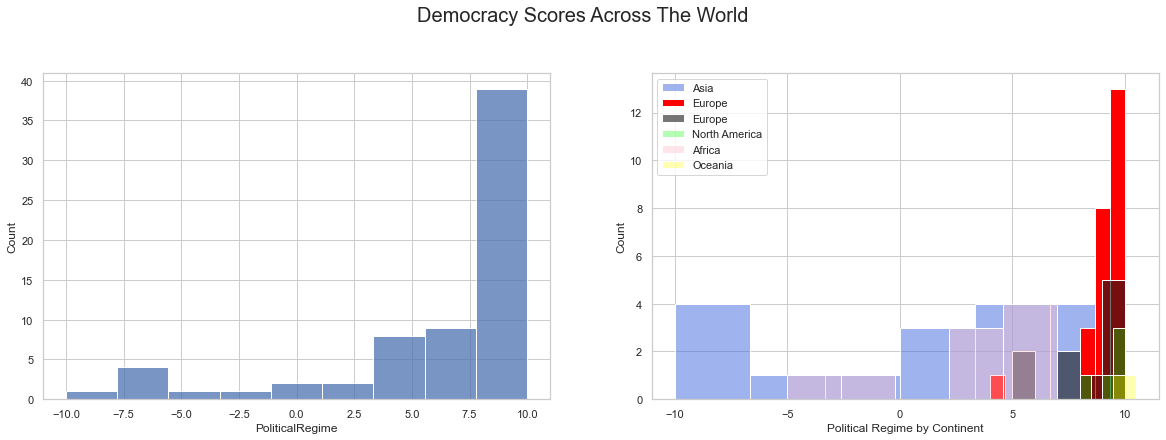

In [20]:
# modified the code from python graph gallery
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# histgram on the left
sns.histplot(data=covid_df, x="PoliticalRegime", ax=axs[0])

# histgram on the right
continent = list(set(covid_df.continent))
temp_df = pd.DataFrame({'Political Regime by Continent':covid_df.PoliticalRegime[covid_df.continent==continent[0]], 
           'x2':covid_df.PoliticalRegime[covid_df.continent==continent[1]],
           'x3':covid_df.PoliticalRegime[covid_df.continent==continent[2]],
           'x4':covid_df.PoliticalRegime[covid_df.continent==continent[3]],
           'x5':covid_df.PoliticalRegime[covid_df.continent==continent[4]],
           'x6':covid_df.PoliticalRegime[covid_df.continent==continent[5]]})
sns.histplot(data=temp_df, x='Political Regime by Continent', color="royalblue",alpha=0.5, label=continent[0],ax=axs[1])
sns.histplot(data=temp_df, x="x2", color="red",alpha=1, label=continent[1],ax=axs[1])
sns.histplot(data=temp_df, x="x3", color="k",alpha=0.6, label=continent[1],ax=axs[1])
sns.histplot(data=temp_df, x="x4", color="lime", alpha=0.3, label=continent[3],ax=axs[1])
sns.histplot(data=temp_df, x="x5", color="pink", alpha=0.4, label=continent[4],ax=axs[1])
sns.histplot(data=temp_df, x="x6", color="yellow", alpha=0.3, label=continent[5],ax=axs[1]);

fig.text(0.5, 1, "Democracy Scores Across The World", ha = 'center', fontsize = 20)
plt.legend() 
plt.show()

Get summary statistics by using the summary_table function.

In [21]:
# summary statistics for PoliticalRegime variable
pol_reg_summary = summary_table(['PoliticalRegime'])
pol_reg_summary

,Mean,Median,1st Quantile,3rd quantile,Minimum,Maximum,Non-missing count
PoliticalRegime,6.2687,8.0,5.0,10.0,-10.0,10.0,67


The majority of the world’s countries are now democracies (around 65% coutries scored 6 or higher), which includes almost all countries from North America, South America, Europe and Oceania. In contrast, 8 Asian and African countries are scored below 0, which denote relatively authoritarian regimes. 

## Comparing Vaccination Rates to Other Variables

## Vaccination Rates vs. Total Cases (per million), Total Deaths (per million) and Case Fatality Rate


The 3 scatter plots are used to show the relatinship between the vaccination rate and 3 diffrent variables which are total_cases_per_million, total_deaths_per_million, and case_fatality_rate. The country data points are color-coded by continent. 

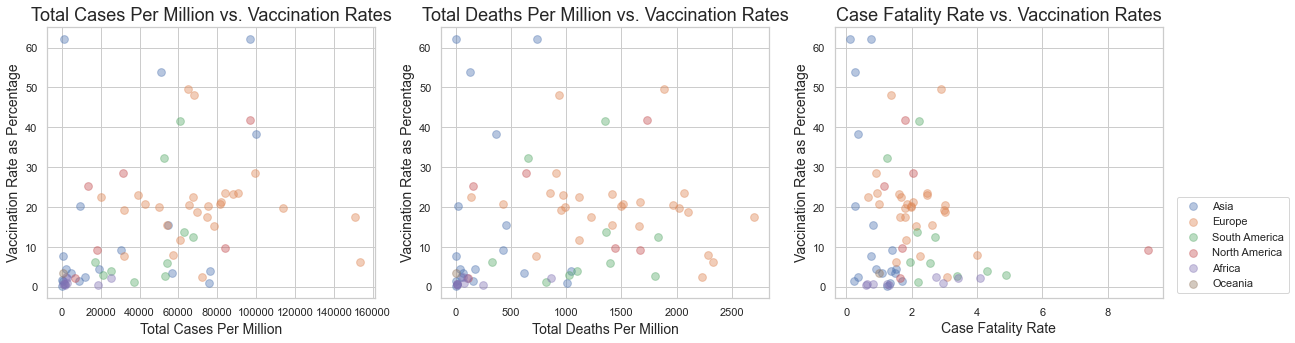

In [22]:
cont = list(set(covid_df.continent))
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for i in range(len(cont)):
    axs[0].scatter(covid_df[covid_df.continent==cont[i]].total_cases_per_million,\
                covid_df[covid_df.continent==cont[i]].vac_rate, s=60,label=cont[i], alpha=0.4)
for i in range(len(cont)):
    axs[1].scatter(covid_df[covid_df.continent==cont[i]].total_deaths_per_million,\
                covid_df[covid_df.continent==cont[i]].vac_rate, s=60,label=cont[i], alpha=0.4)
for i in range(len(cont)):
    axs[2].scatter(covid_df[covid_df.continent==cont[i]].case_fatality_rate,\
                covid_df[covid_df.continent==cont[i]].vac_rate, s=60,label=cont[i], alpha=0.4)
# set titles, labels and legends for each sub-plot
axs[0].set_title("Total Cases Per Million vs. Vaccination Rates",size=18)
axs[1].set_title("Total Deaths Per Million vs. Vaccination Rates",size=18)
axs[2].set_title("Case Fatality Rate vs. Vaccination Rates",size=18)
for i in range(3):
    axs[i].set_ylabel('Vaccination Rate as Percentage',size=14)
axs[0].set_xlabel('Total Cases Per Million',size=14)
axs[1].set_xlabel('Total Deaths Per Million',size=14)
axs[2].set_xlabel('Case Fatality Rate',size=14)
axs[2].legend(bbox_to_anchor=(1.4,0),loc='lower right');

## Age Demographic Plots

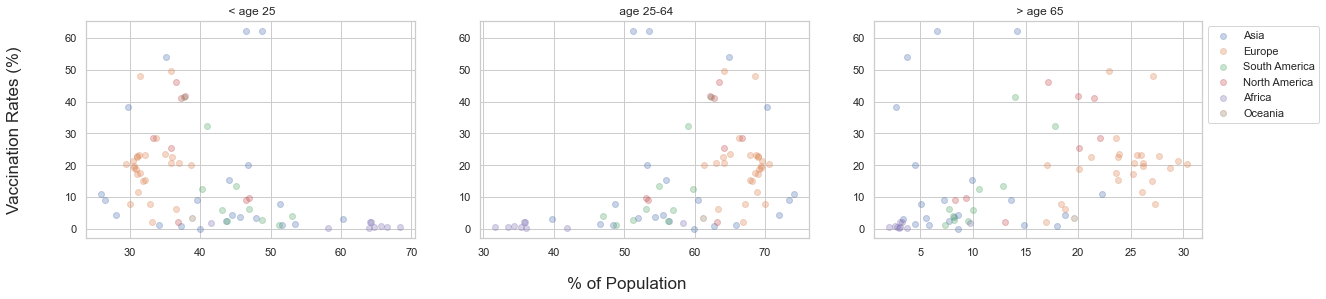

In [23]:
# Age vs vac_rate
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,4)        # plotting area params


cols = ['%Pop < age 25', '%Pop age 25-64', '%Pop > age 65']  # cols of interest
cont = list(set(covid_df.continent))   # for coloring graphs

for j in range(len(cont)):      # plot each age demographic separately
    for i in range(len(cols)):
        axs[i].scatter(covid_df[covid_df.continent==cont[j]][cols[i]], 
                       covid_df[covid_df.continent==cont[j]].vac_rate,
                       label=cont[j], alpha=0.3)
        axs[i].set_title(cols[i].replace('%Pop',''))
        
# formatting        
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
fig.text(0.07, 0.5, 'Vaccination Rates (%)', va='center', rotation='vertical', fontsize = 17)
fig.text(0.5, -.05, "% of Population", ha = 'center', fontsize = 17);

The above code block plots three graphs of vaccination rate vs age group (as a % of population) for three different age groups. It also colors the country data points with respect to continent.

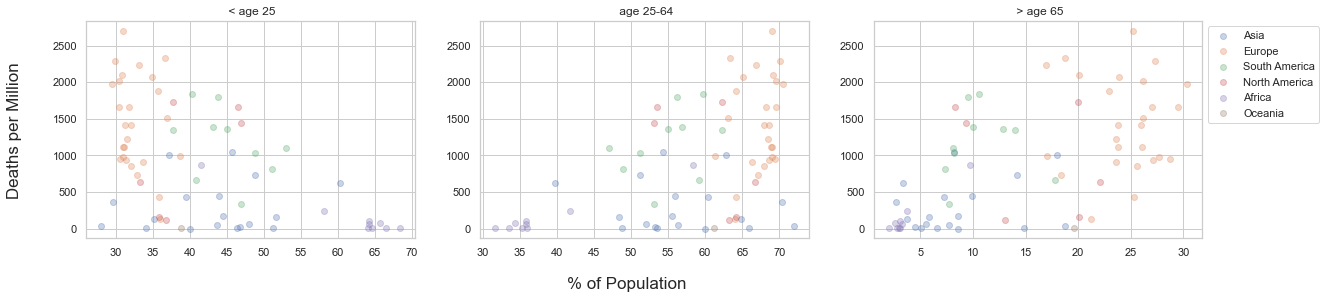

In [24]:
# Age% vs Death per million
fig, axs = plt.subplots(1,3)
fig.set_size_inches(20,4)


cols = ['%Pop < age 25', '%Pop age 25-64', '%Pop > age 65']  # columns of interest
cont = list(set(covid_df.continent))  # list of continents

for j in range(len(cont)):    # plotting the graphs
    for i in range(len(cols)):
        axs[i].scatter(covid_df[covid_df.continent==cont[j]][cols[i]], 
                       covid_df[covid_df.continent==cont[j]].total_deaths_per_million,
                       label=cont[j], alpha=0.3)
        axs[i].set_title(cols[i].replace('%Pop',''))
        
# formatting
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
fig.text(0.07, 0.5, 'Deaths per Million', va='center', rotation='vertical', fontsize = 17)
fig.text(0.5, -.05, "% of Population", ha = 'center', fontsize = 17);

The above code block plots three graphs of deaths vs age group as % of population and again colors the countries by continent.

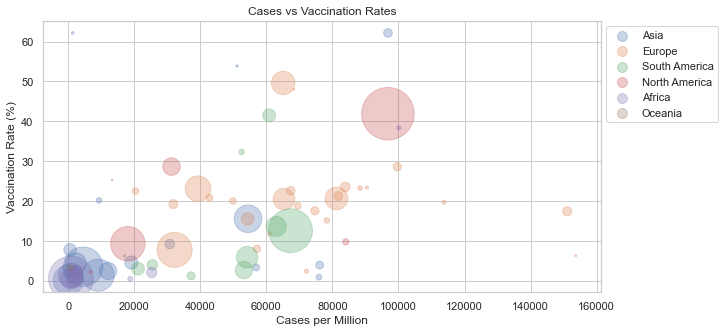

In [25]:
# Cases vs Vacc Rates + Population Size 
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
cont = list(set(covid_df.continent))  # list of continents

for i in range(len(cont)):  # plotting
    ax.scatter(covid_df[covid_df.continent==cont[i]].total_cases_per_million, 
               covid_df[covid_df.continent==cont[i]].vac_rate, 
               s = covid_df[covid_df.continent==cont[i]]["Total Pop (thousands)"]/100000,
               label = cont[i],
              alpha = 0.3)

# Formatting
ax.set_xlabel("Cases per Million")
ax.set_ylabel("Vaccination Rate (%)")
ax.set_title("Cases vs Vaccination Rates")
lgnd = ax.legend(bbox_to_anchor=(1,1),loc='upper left')

for handle in lgnd.legendHandles:   # making the legend symbols sizes uniform
    handle.set_sizes([100])


The above code block plots vaccination rates vs cases in countries, but importantly, scales the points by population size. The country data points are also color-coded by continent.

# Vaccination Rates vs. Health Expenditure

These scatterplots show vaccination rates as a function of the health expenditure variables. The colors of the plot points correspond to the country's continent.

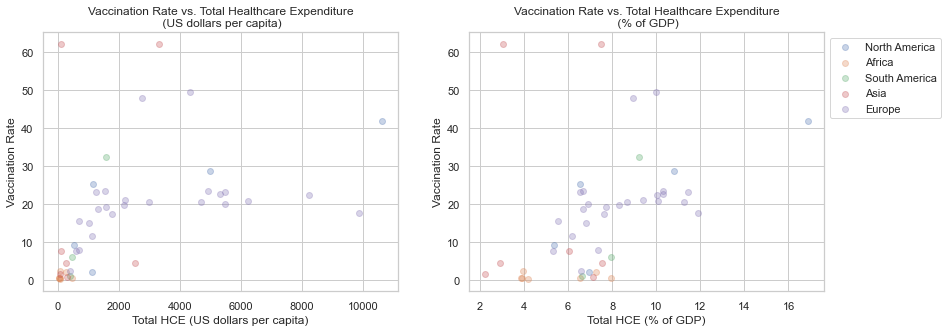

In [26]:
##Total Health Expenditure
## NOTE: Only New Zealand is in continent "Oceania", and we are missing HCE data for New Zealand
cont = list(set(covid_df.continent))
cont2=['North America', 'Africa', 'South America', 'Asia', 'Europe']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,2))
plt.subplots_adjust(top=.8,bottom=-1, hspace=0.2)

for i in range(0,5):
    ax1.scatter(covid_df[covid_df.continent==cont2[i]]["Total HCE (US dollars per capita)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)
for i in range(0,5):
    ax2.scatter(covid_df[covid_df.continent==cont2[i]]["Total HCE (% of GDP)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)

ax1.set_title("Vaccination Rate vs. Total Healthcare Expenditure\n (US dollars per capita)")
ax1.set_ylabel("Vaccination Rate")
ax1.set_xlabel("Total HCE (US dollars per capita)");


ax2.set_title("Vaccination Rate vs. Total Healthcare Expenditure\n (% of GDP)")
ax2.set_ylabel("Vaccination Rate")
ax2.set_xlabel("Total HCE (% of GDP)")

ax2.legend(bbox_to_anchor=(1,1),loc='upper left');

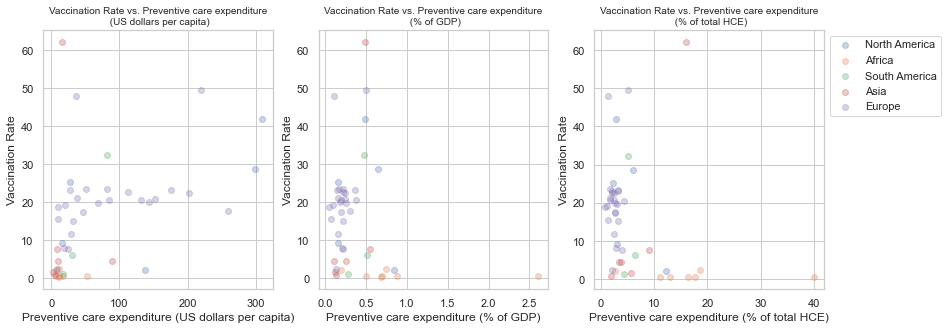

In [27]:
##Preventive Health Expenditure
## NOTE: Only New Zealand is in continent "Oceania", and we are missing HCE data for New Zealand
cont = list(set(covid_df.continent))
cont2=['North America', 'Africa', 'South America', 'Asia', 'Europe']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,2))
plt.subplots_adjust(top=.8,bottom=-1, hspace=0.2)

for i in range(0,5):
    ax1.scatter(covid_df[covid_df.continent==cont2[i]]["Preventive care expenditure (US dollars per capita)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)
for i in range(0,5):
    ax2.scatter(covid_df[covid_df.continent==cont2[i]]["Preventive care expenditure (% of GDP)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)
for i in range(0,5):
    ax3.scatter(covid_df[covid_df.continent==cont2[i]]["Preventive care expenditure (% of total HCE)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)


ax1.set_title("Vaccination Rate vs. Preventive care expenditure\n (US dollars per capita)", fontsize=10)
ax1.set_ylabel("Vaccination Rate")
ax1.set_xlabel("Preventive care expenditure (US dollars per capita)");

ax2.set_title("Vaccination Rate vs. Preventive care expenditure\n (% of GDP)", fontsize=10)
ax2.set_ylabel("Vaccination Rate")
ax2.set_xlabel("Preventive care expenditure (% of GDP)");

ax3.set_title("Vaccination Rate vs. Preventive care expenditure\n (% of total HCE)", fontsize=10)
ax3.set_ylabel("Vaccination Rate")
ax3.set_xlabel("Preventive care expenditure (% of total HCE)");

ax3.legend(bbox_to_anchor=(1,1),loc='upper left');

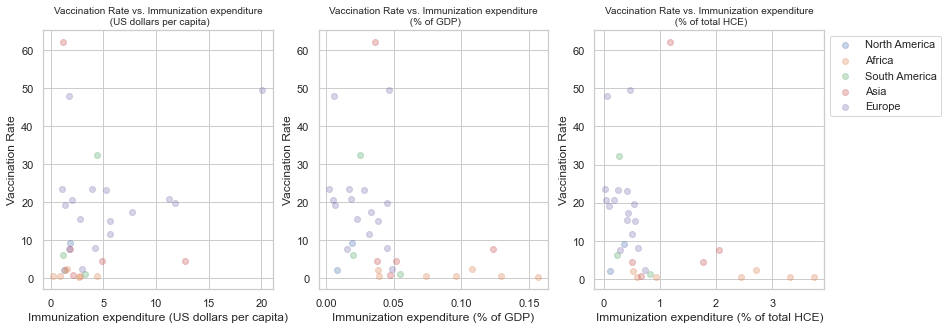

In [28]:
##Immunization Expenditure
## NOTE: Only New Zealand is in continent "Oceania", and we are missing HCE data for New Zealand
cont = list(set(covid_df.continent))
cont2=['North America', 'Africa', 'South America', 'Asia', 'Europe']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,2))
plt.subplots_adjust(top=.8,bottom=-1, hspace=0.2)

for i in range(0,5):
    ax1.scatter(covid_df[covid_df.continent==cont2[i]]["Immunization expediture (US dollars per capita)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)
for i in range(0,5):
    ax2.scatter(covid_df[covid_df.continent==cont2[i]]["Immunization expediture (% of GDP)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)
for i in range(0,5):
    ax3.scatter(covid_df[covid_df.continent==cont2[i]]["Immunization expediture (% of total HCE)"],\
                covid_df[covid_df.continent==cont2[i]].vac_rate, label=cont2[i], alpha=0.3)

ax1.set_title("Vaccination Rate vs. Immunization expenditure\n (US dollars per capita)", fontsize=10)
ax1.set_ylabel("Vaccination Rate")
ax1.set_xlabel("Immunization expenditure (US dollars per capita)");


ax2.set_title("Vaccination Rate vs. Immunization expenditure\n (% of GDP)", fontsize=10)
ax2.set_ylabel("Vaccination Rate")
ax2.set_xlabel("Immunization expenditure (% of GDP)");

ax3.set_title("Vaccination Rate vs. Immunization expenditure\n (% of total HCE)", fontsize=10)
ax3.set_ylabel("Vaccination Rate")
ax3.set_xlabel("Immunization expenditure (% of total HCE)");


ax3.legend(bbox_to_anchor=(1,1),loc='upper left');


ax3.legend(bbox_to_anchor=(1,1),loc='upper left');


## Vaccination Rates vs. Democracy Score

The scatter plot shows vaccination rates as a function of democracy score of each coutry. The colors represent 6 different continents. 

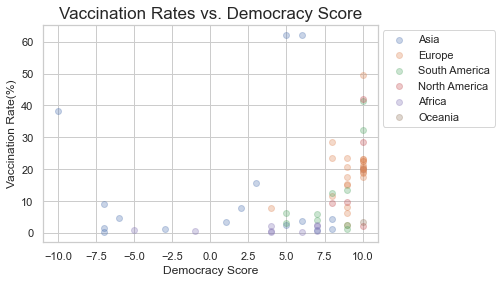

In [29]:
cont = list(set(covid_df.continent))
for i in range(len(cont)):
    plt.scatter(covid_df[covid_df.continent==cont[i]].PoliticalRegime,\
                covid_df[covid_df.continent==cont[i]].vac_rate, label=cont[i], alpha=0.3)

#plot title, x and y labels, and legend
plt.title('Vaccination Rates vs. Democracy Score',size=17)
plt.xlabel('Democracy Score')
plt.ylabel('Vaccination Rate(%)')
plt.legend(bbox_to_anchor=(1,1),loc='upper left');